In [1]:
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb
from pathlib import Path
import numpy as np

from pluma.preprocessing.resampling import resample_temporospatial
from pluma.preprocessing.ecg import heartrate_from_ecg
from pluma.export.ogcapi.features import export_geoframe_to_geojson
from pluma.export.ogcapi.records import DatasetRecord, RecordProperties, Contact
from pluma.stream.georeference import Georeference
from pluma.stream.ubx import _UBX_MSGIDS
from pluma.schema import Dataset
from FmulSchema import custom_schema
from helpers import *

## Notebook plotting
%matplotlib inline
plt.style.use('ggplot')

## Figure export parameters
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
import matplotlib as mpl
mpl.rcParams.update(new_rc_params)


# Set the paths to the dataset and build the dataset

c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z\Streams_33 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z\Streams_227 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional

@(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z\20230908160758_BenchmarkPupil.nedf
Reading file...
Header information has been correctly retrieved.
Attempting to automatically correct eeg timestamps to harp timestamps...
Done.


c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z\Streams_211 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z\Streams_213 could not be found.
  warnings.warn(f'Harp stream file\
c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\io\harp.py:44: UserWarning: Harp stream file            @(WIN) --> C:\Users\gonca\NeuroGEARS Ltd\Emotiona

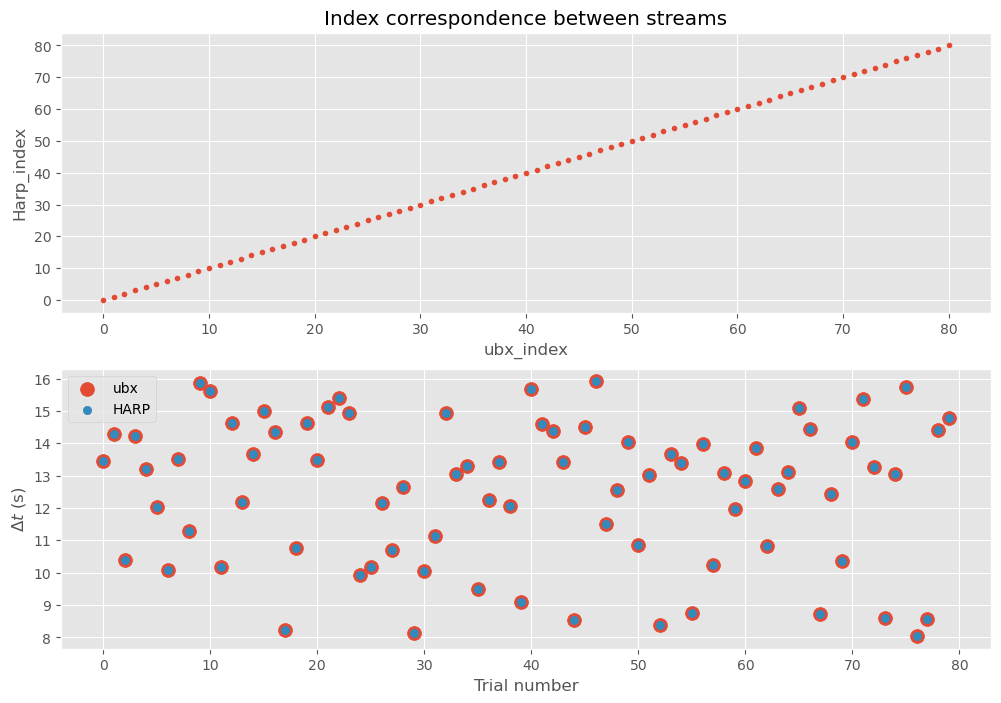

Dataset: <pluma.schema.Dataset object at 0x00000237FE093D60> loaded successfully, and sucessfully calibrated.


In [2]:
# Path to the dataset. Can be local or remote.
dataset_root = r"C:\Users\gonca\NeuroGEARS Ltd\Emotional Cities - Documents\Experiment Control and Acquisition\Datasets"
# root = r"\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE822001_2023-09-08T141128Z"
root = r"\Lansing\DownTownUrban\Lansing_DownTownUrban_sub-OE823001_2023-09-08T150636Z"

dataset = load_dataset(f"{dataset_root}{root}", schema=custom_schema)
print(f"Dataset: {dataset} loaded successfully, and {'not' if not dataset.has_calibration else 'sucessfully'} calibrated." )

## Export to SDI geoframe

In [ ]:
gdf = dataset.to_geoframe(rereference_to_ubx_time=True)

## Dataset structure
The Dataset class follows the following structure:
```
Dataset/
├─ rootfolder
├─ datasetlabel
├─ streams/
├─ georeference/
```

 - `rootfolder` and `datasetlabel` are properties that store the location and label of the dataset, respectively.
 - `streams` is a `DotMap` structure with the initialized schema and, if loaded, all the data. The data of each stream can be generally accessed using `dataset.Stream.data`. Additionally, the Streams can be easily navigated using the "." (dot) notation to access different, potentially nested, relevant fields.
 - `georeference` stores the DataFrame necessary to "geotag" sensor data (*i.e.* to cross-reference in time)

In [ ]:
# For simplicity a general method can be used to attempt to plot the data inside a stream:
plot_stream(dataset.streams.TK.AirQuality.IAQIndex)

## Visualization:

We are not in a position where we can visualize data in both time and space. The following cells will demo this affordance.

In [23]:
# The first time you run tilemapbase library, you will need to initiate a cache structure
# Initialize tilemapbase cache (run this only once)
if True:
    import tilemapbase as tmb
    tmb.init(create=True)
plot_kwargs = {
    'markersize': 5,
    'to_aspect': (6.8/3),
    'figsize': (10,10),
    'tiles': tmb.tiles.build_OSM()
}

In [ ]:
# First we will plot the spatial data colorcoded by time
plot_path(dataset, **plot_kwargs)

""


In [ ]:
# plot resampled data in time and space using a dataset georeference. By default, it resamples the data to 2s bins
resampled = resample_temporospatial(dataset.streams.TK.AirQuality.IAQIndex.data, dataset.georeference)
plot_geospatial(resampled, **plot_kwargs, title='Air Quality Index')

c:\Users\gonca\Projects\github\emotional-cities\notebooks\.conda\lib\site-packages\pluma\export\maps.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  im = ax.scatter(
c:\Users\gonca\Projects\github\emotional-cities\notebooks\src\poc-v1\Benchmarks\FmulDataset\helpers.py:71: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\gonca\Projects\github\emotional-cities\notebooks\src\poc-v1\Benchmarks\FmulDataset\helpers.py:105: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


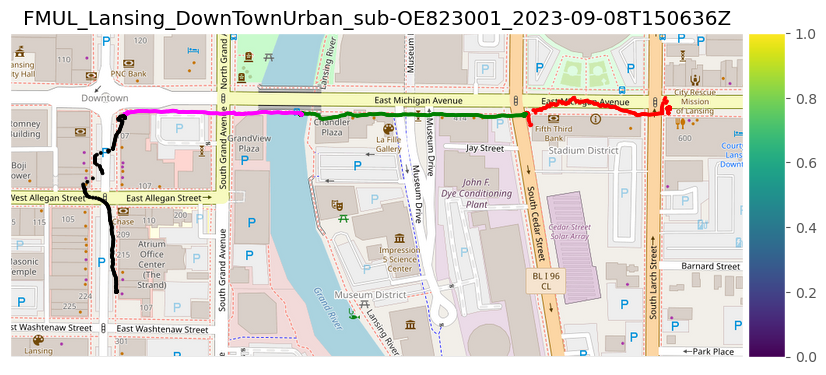

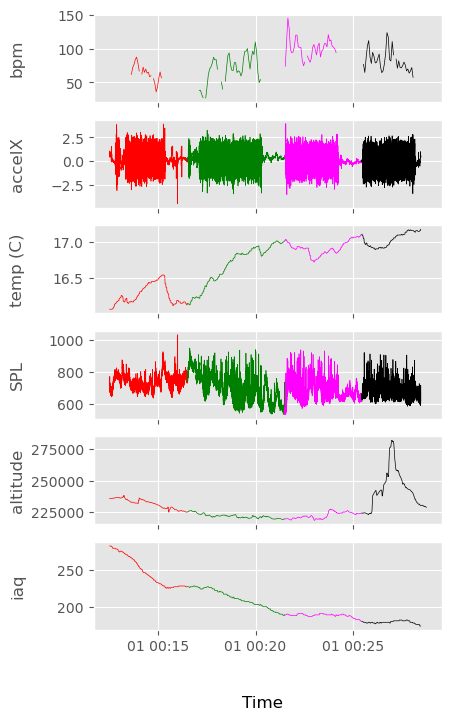

In [24]:
# Sometimes additional preprocessing might be required. As an example, when calculating heart rate from the ECG raw signal.
hr,_ = heartrate_from_ecg(dataset.streams.BioData.ECG,
                            fs = 250, max_heartrate_bpm = 250.0,
                            peak_height = 800, smooth_win = 10) ## Calculates HR from ecg raw signal
resampled = resample_temporospatial(hr, dataset.georeference,
                                    sampling_dt = timedelta(seconds = 4)) #Resample

traces = {
    'bpm': resampled.Data,
    'accelX': dataset.streams.Accelerometer.data["Accl_X"],
    'temp (C)': dataset.streams.TK.AirQuality.Temperature.data/100,
    # 'angleX': dataset.streams.Accelerometer.data["Orientation_X"],
    # 'light': dataset.streams.TK.Dual0_20mA.SolarLight.data,
    'SPL': dataset.streams.TK.SoundPressureLevel.SPL.data,
    'altitude': dataset.georeference.elevation,
    'iaq': dataset.streams.TK.AirQuality.IAQIndex.data
}

plot_example_traces(dataset, traces, **plot_kwargs)

In [ ]:
# Raw EEG traces
plt.figure(figsize=(15,6))
eeg_data = dataset.streams.EEG.data
plt.plot(eeg_data.np_time, eeg_data.np_eeg, lw = 0.5)
plt.show()

In [25]:
# load and reindex pupil gaze data
gaze = load_pupilgaze(dataset)
vgaze = reindex_pupilgaze(dataset, gaze)
video = load_pupilvideo(dataset)
vgaze

,x,y,frame,Latitude,Longitude,Elevation,geometry
Seconds,,,,,,,
1904-01-01 00:11:11.693984,419.784668,484.964691,0,42.733486,-84.544479,229458.2,POINT Z (-84.54448 42.73349 229458.20000)
1904-01-01 00:11:11.702976,419.959259,484.914429,1,42.733486,-84.544479,229458.2,POINT Z (-84.54448 42.73349 229458.20000)
1904-01-01 00:11:11.716992,420.832642,485.048737,2,42.733486,-84.544479,229458.2,POINT Z (-84.54448 42.73349 229458.20000)
1904-01-01 00:11:11.741984,419.221466,485.700897,3,42.733486,-84.544479,229458.2,POINT Z (-84.54448 42.73349 229458.20000)
1904-01-01 00:11:11.962976,414.643036,487.481323,4,42.733486,-84.544479,229458.2,POINT Z (-84.54448 42.73349 229458.20000)
...,...,...,...,...,...,...,...
1904-01-01 00:28:26.744000,505.873596,633.362793,31030,42.731635,-84.552100,230226.0,POINT Z (-84.55210 42.73164 230226.00000)
1904-01-01 00:28:26.757984,502.866730,632.583923,31031,42.731635,-84.552100,230226.0,POINT Z (-84.55210 42.73164 230226.00000)
1904-01-01 00:28:26.780000,499.151672,629.862305,31032,42.731635,-84.552100,230226.0,POINT Z (-84.55210 42.73164 230226.00000)


In [27]:
vgaze[['x', 'y']].to_csv('vgaze_urban.csv')

In [ ]:
## Comparison of HR given by Empatica and raw ECG signal:
plt.figure(figsize=(15,6))
plt.plot(hr, label = 'ECG')
plt.plot(dataset.streams.Empatica.data.E4_Hr['Value'], label = 'Empatica')
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
plt.legend()
plt.show()

In [ ]:
dataset.streams.Empatica.data.R

In [ ]:
## Export streams to csv
dataset.streams.TK.AirQuality.Temperature.export_to_csv("root")
